In [1]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
from virtualscada.vs import removeRows
from virtualscada.vs import fillValuesMLPFInverse
import matplotlib.pyplot as plt

# Data Processing

In [2]:
p = pd.read_csv('C:/Users/Serhan/PycharmProjects/virtual-scada/Data/output_p.csv', header = None)
q = pd.read_csv('C:/Users/Serhan/PycharmProjects/virtual-scada/Data/output_q.csv', header = None)
v = pd.read_csv('C:/Users/Serhan/PycharmProjects/virtual-scada/Data/output_v.csv', header = None)
a = pd.read_csv('C:/Users/Serhan/PycharmProjects/virtual-scada/Data/output_a.csv', header = None)

In [3]:
vRemoved = removeRows(v, .3, colPercentage = .5)
aRemoved = removeRows(a, .3, colPercentage = .5)

..\virtualscada\vs.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dataRemoved[i][j] = None


# Virtual SCADA

In [4]:
vFilled, aFilled = fillValuesMLPFInverse(p, q, vRemoved, aRemoved, max_iter = 1e4, C_set = [1,5,10], eps_set=[1e-5, 1e-3, 0.1], mode = 'lr')

[[0.]] [[0.]]


# Results

In [5]:
numRows, numCols = v.shape
predictions = []
actuals = []
for i in range(numCols):
    for j in range(numRows):
        if np.isnan(vRemoved[i][j]):
            predictions.append(vFilled[i][j])
            actuals.append(v[i][j])
                
print(np.sqrt(np.nanmean((np.array(predictions)-np.array(actuals))**2)))

0.5094842545046028


Text(0, 0.5, 'Voltage Magnitude')

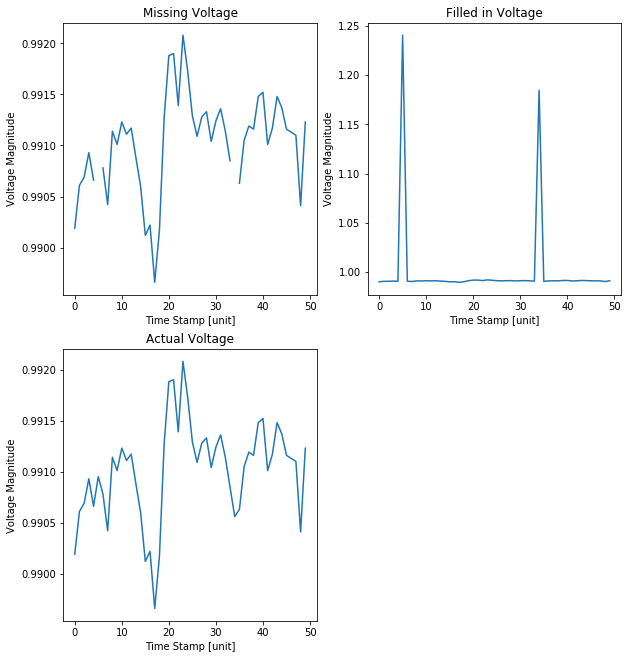

In [6]:
sampleBus = np.random.randint(0,29)

plt.figure(figsize=(10, 11))
plt.subplot(221)
plt.plot(vRemoved[sampleBus][0:50])
plt.title('Missing Voltage')
plt.xlabel('Time Stamp [unit]')
plt.ylabel('Voltage Magnitude')
plt.subplot(222)
plt.plot(vFilled[sampleBus][0:50])
plt.title('Filled in Voltage')
plt.xlabel('Time Stamp [unit]')
plt.ylabel('Voltage Magnitude')
plt.subplot(223)
plt.plot(v[sampleBus][0:50])
plt.title('Actual Voltage')
plt.xlabel('Time Stamp [unit]')
plt.ylabel('Voltage Magnitude')

In [ ]:
x = [1,2,3]
print(x[None])